In [1]:
import pandas as pd
from pandas.io.json import json_normalize 
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Below import will allow multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data = pd.read_json('dkdata.json')
data.head(5)

,data
0,{'payer_name': 'AZARBAYCAN METANOL KOMPANI MMC...
1,"{'payer_name': 'LCM ALLIANCE LLP', 'payer_juri..."
2,{'payer_name': 'SKN ELECTRICAL SERVICES LIMITE...
3,"{'payer_name': 'METASTAR INVEST LLP', 'payer_j..."
4,"{'payer_name': 'METASTAR INVEST LLP', 'payer_j..."


In [3]:
# Convert that column into a 'normalized' DataFrame with json_normalize
data = json_normalize(data['data']) 

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24848\928915903.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  data = json_normalize(data['data'])


In [4]:
#how many rows exist

print(f"The dataset contains {len(data)} rows (transactions)")

The dataset contains 16940 rows (transactions)


In [5]:
#how many columns exist

print(f"The dataset contain {len(data.columns)} columns")

The dataset contain 23 columns (features)


In [6]:
pd.options.display.float_format = "{:.2f}".format #change float format 
data.describe() # descriptive stats

,amount_orig,id,amount_usd
count,16940.00,16940.00,16940.00
mean,-17236.91,8470.50,360068.35
std,905089.41,4890.30,729466.61
min,-14603481.92,1.00,1.00
25%,-147107.75,4235.75,21022.75
50%,-25890.82,8470.50,92867.00
75%,-503.75,12705.25,361142.00
max,20559970.00,16940.00,20559970.00


In [7]:
#Descriptive stats for non numeric values
data.describe(include=['O', 'bool']) 

,payer_name,payer_jurisdiction,payer_account,source_file,beneficiary_type,beneficiary_core,amount_orig_currency,beneficiary_name,beneficiary_jurisdiction,investigation,beneficiary_bank_country,beneficiary_name_norm,payer_core,beneficiary_account,purpose,date,amount_eur,payer_type,payer_name_norm,payer_bank_country
count,16940,16940,16825,16940,16940,16940,16940,16940,16940,16940,16936,16940,16940,16936,16940,16940,16940,16940,16940,16825
unique,437,43,368,6,3,2,6,3553,84,1,147,3185,2,3435,15933,645,10992,3,395,49
top,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/METASTAR Account statement 30.06.12-31.12....,Company,False,USD,LCM ALLIANCE LLP,GB,az,EE,LCM ALLIANCE LLP,True,EE27 3300 3335 0561 0002,OWN PAYMENT,2013-06-12,"$20,000.00",Company,HILUX SERVICES LP,EE
freq,5178,15074,5056,4931,15998,12607,12032,1758,8273,16940,5510,1758,13188,1708,129,114,84,16877,5178,13147


There are 368 and 3435 payer and beneficiary accounts respectively

There are 43 payer jurisdictions with Great Britain being the top representing 89% of the data (freq/count)

There are 437 listed payers with Hilux Services LP being the top user representing 31% of transactions

June 12th, 2013 experienced the most transactions recording 114 transactions

10% of beneficiary transactions went to account EE27 3300 3335 0561 0002

30% of payer transactions came from account EE12 3300 3335 1615 0001

In [8]:
#show the currency amount in the transaction
data['amount_orig_currency'].value_counts()

#CHF is Swiss Franc
#EUR is Euro
#GBP is Great British Pound
#RUB is Russian Ruble
#SEK is Swedish Krona
#USD is US Dollar


USD    12032
EUR     4554
RUB      155
GBP      126
CHF       71
SEK        2
Name: amount_orig_currency, dtype: int64

In [9]:
#check data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16940 entries, 0 to 16939
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payer_name                16940 non-null  object 
 1   payer_jurisdiction        16940 non-null  object 
 2   payer_account             16825 non-null  object 
 3   source_file               16940 non-null  object 
 4   amount_orig               16940 non-null  float64
 5   id                        16940 non-null  int64  
 6   beneficiary_type          16940 non-null  object 
 7   beneficiary_core          16940 non-null  bool   
 8   amount_orig_currency      16940 non-null  object 
 9   beneficiary_name          16940 non-null  object 
 10  beneficiary_jurisdiction  16940 non-null  object 
 11  investigation             16940 non-null  object 
 12  beneficiary_bank_country  16936 non-null  object 
 13  beneficiary_name_norm     16940 non-null  object 
 14  payer_

In [10]:
#convert amount_eur to float currently a string even though it is a numeric value and remove symbols

data['amount_eur'] = data['amount_eur'].str.replace('$','')
data['amount_eur'] = data['amount_eur'].str.replace(',','')
data['amount_eur'] = data['amount_eur'].astype(float)

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24848\1782987353.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['amount_eur'] = data['amount_eur'].str.replace('$','')


In [18]:
#Ensure all values are positive (can't transact a negative value)

data['amount_orig'] = data['amount_orig'].abs()
data['amount_eur'] = data['amount_eur'].abs()
data['amount_usd'] = data['amount_usd'].abs()

In [27]:
#Ensure all jurisdictions are unique

print('beneficiary_jurisdiction')
data['beneficiary_jurisdiction'].unique()

#notice 'unknown' and 'CN\n'

data['beneficiary_jurisdiction'] = data['beneficiary_jurisdiction'].replace('CN\n', 'CN')
data['beneficiary_jurisdiction'] = data['beneficiary_jurisdiction'].replace('UNKNOWN', np.nan)
data['beneficiary_jurisdiction'].unique()

print('payer_jurisdiction')
data['payer_jurisdiction'].unique()

data['payer_jurisdiction'] = data['payer_jurisdiction'].replace('UNKNOWN', np.nan)


beneficiary_jurisdiction


array(['GB', 'VG', 'NZ', 'IT', nan, 'TR', 'DE', 'US', 'RU', 'AE', 'GE',
       'PA', 'SE', 'UA', 'CN', 'PL', 'CY', 'ES', 'HK', 'SG', 'SI', 'JP',
       'CH', 'LU', 'CZ', 'BY', 'AZ', 'BE', 'LV', 'NL', 'KR', 'RO', 'BG',
       'IE', 'NR', 'AT', 'MK', 'FI', 'SK', 'FR', 'ID', 'TG', 'HU', 'KZ',
       'PT', 'UZ', 'DK', 'IN', 'LR', 'TM', 'RS', 'CA', 'MY', 'LI', 'EE',
       'AU', 'LT', 'TW', 'MD', 'IM', 'IL', 'MV', 'CO', 'EC', 'ZA', 'AI',
       'PH', 'GR', 'TH', 'BR', 'LK', 'KW', 'BM', 'VN', 'KG', 'MT', 'HR',
       'ME', 'SC', 'MN', 'LB', 'DM', 'JE'], dtype=object)

array(['GB', 'VG', 'NZ', 'IT', nan, 'TR', 'DE', 'US', 'RU', 'AE', 'GE',
       'PA', 'SE', 'UA', 'CN', 'PL', 'CY', 'ES', 'HK', 'SG', 'SI', 'JP',
       'CH', 'LU', 'CZ', 'BY', 'AZ', 'BE', 'LV', 'NL', 'KR', 'RO', 'BG',
       'IE', 'NR', 'AT', 'MK', 'FI', 'SK', 'FR', 'ID', 'TG', 'HU', 'KZ',
       'PT', 'UZ', 'DK', 'IN', 'LR', 'TM', 'RS', 'CA', 'MY', 'LI', 'EE',
       'AU', 'LT', 'TW', 'MD', 'IM', 'IL', 'MV', 'CO', 'EC', 'ZA', 'AI',
       'PH', 'GR', 'TH', 'BR', 'LK', 'KW', 'BM', 'VN', 'KG', 'MT', 'HR',
       'ME', 'SC', 'MN', 'LB', 'DM', 'JE'], dtype=object)

payer_jurisdiction


array(['AZ', 'GB', 'VG', 'EE', 'NZ', 'DE', 'CN', 'US', nan, 'CY', 'TR',
       'BE', 'ES', 'HK', 'RU', 'NL', 'CA', 'IN', 'KZ', 'MT', 'PA', 'SG',
       'CZ', 'PY', 'AE', 'FI', 'DK', 'GE', 'UA', 'LI', 'BM', 'RO', 'LV',
       'KW', 'KR', 'FR', 'BG', 'TW', 'IE', 'IT', 'CH', 'QA', 'IL'],
      dtype=object)

In [28]:
# previous cell with 'data.info()' found 'payer_bank_country' to have missing values

data['payer_bank_country'] = data['payer_bank_country'].fillna(np.nan)
data['payer_bank_country'].unique()

array(['33', 'EE', '20', nan, 'LV', 'CH', 'CY', 'TR', 'BE', 'NL', '10',
       'LI', '06', '38', '40', '00', 'DK', 'DE', 'KZ', 'MT', '39', 'CZ',
       '01', 'AE', '35', 'TX', 'AZ', 'MD', 'NR', 'OS', 'TA', '50', '41',
       'GE', '36', '26', '11', 'RO', '55', '60', 'FR', 'BG', 'LT', '90',
       '12', 'IT', '66', 'QA', '87', 'LU'], dtype=object)

In [29]:
#let's see when the top 10 largest transactions, payers, and beneficiaries

print('Top 10 largest transactions by date')
data.groupby('date')['amount_usd'].sum().nlargest(10)
print('Top 10 largest transactions by payer name')
data.groupby('payer_name')['amount_usd'].sum().nlargest(10)
print('Top 10 largest transactions by beneficiary name')
data.groupby('beneficiary_name')['amount_usd'].sum().nlargest(10)

Top 10 largest transactions by date


date
2013-11-28    40870127
2013-06-06    34397151
2013-11-25    32869474
2014-10-10    32269381
2013-06-12    32171514
2013-12-27    30997006
2013-09-19    30733395
2013-06-10    30300802
2014-08-25    29772918
2013-04-15    29637690
Name: amount_usd, dtype: int64

Top 10 largest transactions by payer name


payer_name
HILUX SERVICES LP            1587710923
BAKTELEKOM MMC               1452918429
LCM ALLIANCE LLP              845191172
METASTAR INVEST LLP           452323815
POLUX MANAGEMENT LP           333122969
FABERLEX LP                   169291640
JETFIELD NETWORKS LIMITED     104797289
RIVERLANE LLP                  73876597
SOVER DEVELOPMENT LLP          46845653
ELEKTROMASH MMC                45700000
Name: amount_usd, dtype: int64

Top 10 largest transactions by beneficiary name


beneficiary_name
HILUX SERVICES LP         1539388216
LCM ALLIANCE LLP           860794229
METASTAR INVEST LLP        388838611
POLUX MANAGEMENT LP        315036343
FABERLEX LP                195992175
KG COMMERCE LLP            128097796
BONDWEST LLP               117404211
OVERMOND LLP               117326151
RICHFIELD TRADING L.P.     113327390
AVROMED COMPANY LLP         92290000
Name: amount_usd, dtype: int64

Time Series

<AxesSubplot:xlabel='date'>

Text(0.5, 0, 'Timeline')

Text(0, 0.5, 'Transaction amounts (in millions USD)')

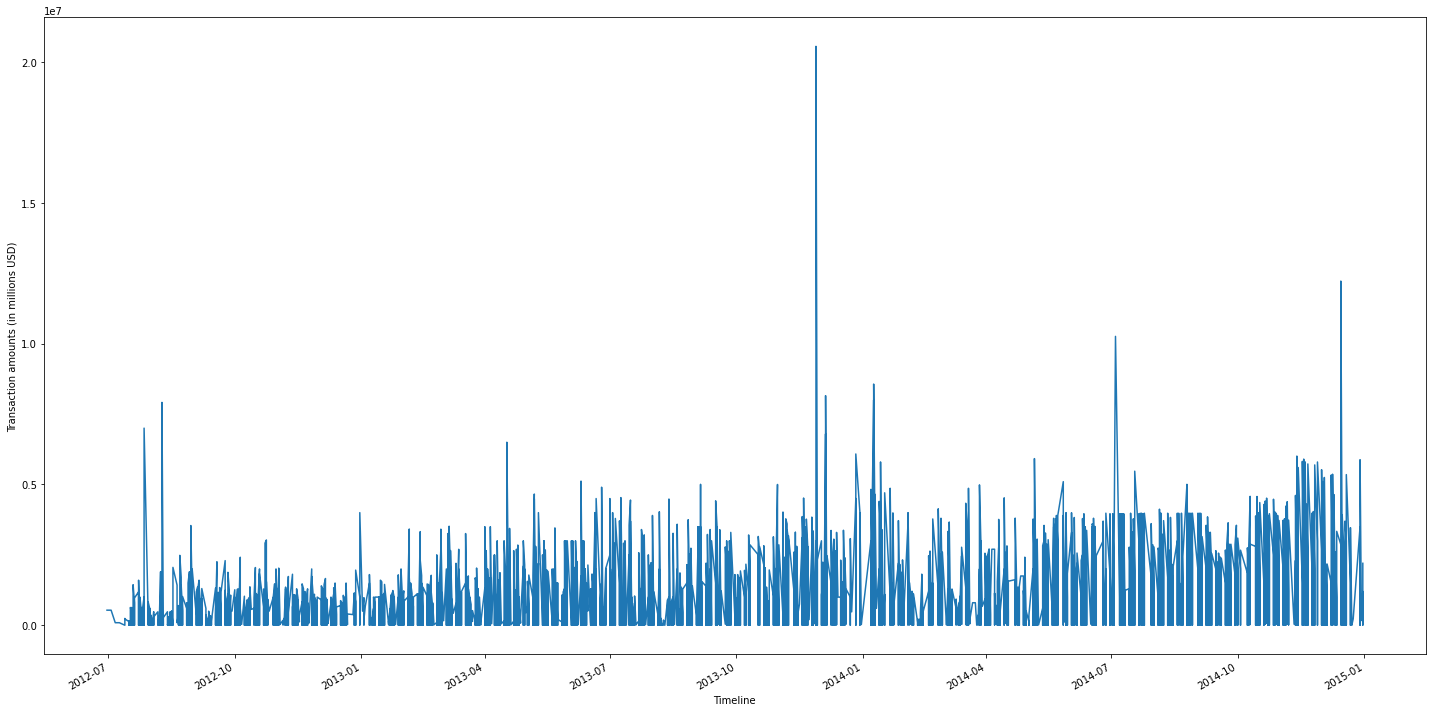

In [30]:
data['date'] = pd.to_datetime(data['date']) #set datatype as datetime
db_series = pd.Series(data['amount_usd'].values, index=data.date)
db_series.plot(legend=False, figsize=[20, 10])
plt.xlabel('Timeline')  
plt.ylabel('Transaction amounts (in millions USD)') 
plt.tight_layout()
plt.show()

In [31]:
tsdf = data.set_index('date')
tsdf.head(1)

,payer_name,payer_jurisdiction,payer_account,source_file,amount_orig,id,beneficiary_type,beneficiary_core,amount_orig_currency,beneficiary_name,...,beneficiary_bank_country,beneficiary_name_norm,payer_core,beneficiary_account,purpose,amount_usd,amount_eur,payer_type,payer_name_norm,payer_bank_country
date,,,,,,,,,,,,,,,,,,,,,
2012-06-30,AZARBAYCAN METANOL KOMPANI MMC,AZ,33817018409333311204,pdf/LCM ALLIANCE Account statement 30.06.12-31...,535470.00,6049,Company,True,USD,LCM ALLIANCE LLP,...,EE,LCM ALLIANCE LLP,False,EE27 3300 3335 0561 0002,1206295100052180 OCT4121800021 ADVANCE PAYM FO...,535470,431762.31,Company,AZARBAYCAN METANOL KOMPANI MMC,33


In [32]:
tsdf.nlargest(10, ['amount_usd'])

#These are the 10 largest transactions and their details

,payer_name,payer_jurisdiction,payer_account,source_file,amount_orig,id,beneficiary_type,beneficiary_core,amount_orig_currency,beneficiary_name,...,beneficiary_bank_country,beneficiary_name_norm,payer_core,beneficiary_account,purpose,amount_usd,amount_eur,payer_type,payer_name_norm,payer_bank_country
date,,,,,,,,,,,,,,,,,,,,,
2013-11-28,SECURO LTD.,NaN,NL11ATBA0802866001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,20559970.00,1604,Company,True,USD,HILUX SERVICES LP,...,EE,HILUX SERVICES LP,False,EE12 3300 3335 1615 0001,1311275108326781 SUPPLY CONTRACT AZ/256/2013 I...,20559970,15180865.05,Company,SECURO LTD.,NL
2014-12-15,SECURO LIMITED,GB,LU450825017019781001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,9800000.00,1044,Company,True,EUR,HILUX SERVICES LP,...,EE,HILUX SERVICES LP,False,EE12 3300 3335 1615 0001,1412125105574718 /INV/001/934 DATE 10.12.2014,12223552,9800000.00,Company,SECURO LIMITED,LU
2014-07-04,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,7500000.00,651,Company,False,EUR,FABERLEX LP,...,EE,FABERLEX LP,True,EE683300333516210006,PAYMENT TO THE CONTRACT N 5 DD.02.12.2013,10259357,7500000.00,Company,HILUX SERVICES LP,EE
2014-07-04,ARASH MEDICAL PRODUCTION LTD,AZ,LV69AIZK0001140063593,pdf/HILUX Account statement 30.06.12-31.12.14.xml,7500000.00,650,Company,True,EUR,HILUX SERVICES LP,...,EE,HILUX SERVICES LP,False,EE12 3300 3335 1615 0001,1407035107325514 PAYMENT FOR EQUIPMENT CONTRAC...,10259357,7500000.00,Company,ARASH MEDICAL PRODUCTION LTD,LV
2014-01-09,MODIAR,AZ,TXID/AZ/1700986181,pdf/HILUX Account statement 30.06.12-31.12.14.xml,8565906.50,14134,Company,True,USD,HILUX SERVICES LP,...,EE,HILUX SERVICES LP,False,EE12 3300 3335 1615 0001,1401085101288436 INV HS-04/02-36 26 12 13 FULL...,8565907,6227148.48,Person,MODIAR,TX
2013-12-05,ARASH MEDICAL PRODUCTION LTD,AZ,LV69AIZK0001140063593,pdf/HILUX Allegato 4.xml,6000000.00,4349,Company,True,EUR,HILUX SERVICES LP,...,EE,HILUX SERVICES LP,False,EE12 3300 3335 1615 0001,1312045105228931 FOR MEDICAL EQUIPMENT AGREEME...,8154113,6000000.00,Company,ARASH MEDICAL PRODUCTION LTD,LV
2014-01-09,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,8000000.00,1876,Company,False,USD,KG COMMERCE LLP,...,EE,KG COMMERCE LLP,True,EE333300333505590009,1401095076846464 PAYMENT TO THE CONTRACT N 333...,8000000,5815752.00,Company,HILUX SERVICES LP,EE
2012-08-09,JETFIELD NETWORKS LIMITED,NZ,333488110001,pdf/METASTAR Account statement 30.06.12-31.12....,7915400.00,10730,Company,True,USD,METASTAR INVEST LLP,...,EE,METASTAR INVEST LLP,False,EE77 3300 3334 8704 0004,1208095025633675 INV.333 DD 30.06.2012,7915400,6455689.42,Company,JETFIELD NETWORKS LIMITED,33
2012-07-27,JETFIELD NETWORKS LIMITED,NZ,333488110001,pdf/METASTAR Account statement 30.06.12-31.12....,7000800.00,10684,Company,True,USD,METASTAR INVEST LLP,...,EE,METASTAR INVEST LLP,False,EE77 3300 3334 8704 0004,1207275026111230 INV.333 DD 30.06.2012,7000800,5544220.55,Company,JETFIELD NETWORKS LIMITED,33


In [36]:
#See if a company paid itself

a = tsdf[tsdf['payer_name_norm'] == tsdf['beneficiary_name_norm']]
a

,payer_name,payer_jurisdiction,payer_account,source_file,amount_orig,id,beneficiary_type,beneficiary_core,amount_orig_currency,beneficiary_name,...,beneficiary_bank_country,beneficiary_name_norm,payer_core,beneficiary_account,purpose,amount_usd,amount_eur,payer_type,payer_name_norm,payer_bank_country
date,,,,,,,,,,,,,,,,,,,,,
2013-06-05,METASTAR INVEST LLP,GB,LV37CBBR1121885100010,pdf/METASTAR Account statement 30.06.12-31.12....,1070000.00,11848,Company,True,USD,METASTAR INVEST LLP,...,EE,METASTAR INVEST LLP,True,EE77 3300 3334 8704 0004,1306045102956800 REPLENISHMENT OF OWN ACCOUNT,1070000,823686.00,Company,METASTAR INVEST LLP,LV
2013-06-06,METASTAR INVEST LLP CORNWALL BUILD.,GB,LV37CBBR1121885100010,pdf/METASTAR Account statement 30.06.12-31.12....,1004150.00,10121,Company,True,EUR,METASTAR INVEST LLP,...,EE,METASTAR INVEST LLP,True,EE77 3300 3334 8704 0004,1306065105639260 REPLENISHMENT OF OWN ACCOUNT,1304430,1004150.00,Company,METASTAR INVEST LLP,LV
2013-06-07,METASTAR INVEST LLP CORNWALL BUILD.,GB,LV37CBBR1121885100010,pdf/METASTAR Account statement 30.06.12-31.12....,95995.00,10128,Company,True,EUR,METASTAR INVEST LLP,...,EE,METASTAR INVEST LLP,True,EE77 3300 3334 8704 0004,1306075100483118 REPLENISHMENT OF OWN ACCOUNT,124702,95995.00,Company,METASTAR INVEST LLP,LV
2013-06-07,METASTAR INVEST LLP CORNWALL BUILD.,GB,LV37CBBR1121885100010,pdf/METASTAR Account statement 30.06.12-31.12....,155300.00,10127,Company,True,EUR,METASTAR INVEST LLP,...,EE,METASTAR INVEST LLP,True,EE77 3300 3334 8704 0004,1306075102245734 REPLENISHMENT OF OWN ACCOUNT,201741,155300.00,Company,METASTAR INVEST LLP,LV
2013-06-07,METASTAR INVEST LLP,GB,LV37CBBR1121885100010,pdf/METASTAR Account statement 30.06.12-31.12....,1210000.00,11864,Company,True,USD,METASTAR INVEST LLP,...,EE,METASTAR INVEST LLP,True,EE77 3300 3334 8704 0004,1306065105233024 REPLENISHMENT OF OWN ACCOUNT,1210000,931458.00,Company,METASTAR INVEST LLP,LV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-21,METASTAR INVEST LLP,GB,LV37CBBR1121885100010,pdf/METASTAR Account statement 30.06.12-31.12....,589974.00,12685,Company,True,USD,METASTAR INVEST LLP,...,EE,METASTAR INVEST LLP,True,EE77 3300 3334 8704 0004,1405205106438991 REPLENISHMENT OF OWN ACCOUNT ...,589974,425386.59,Company,METASTAR INVEST LLP,LV
2014-05-22,METASTAR INVEST LLP,GB,LV37CBBR1121885100010,pdf/METASTAR Account statement 30.06.12-31.12....,914974.00,12687,Company,True,USD,METASTAR INVEST LLP,...,EE,METASTAR INVEST LLP,True,EE77 3300 3334 8704 0004,1405215103364157 REPLENISHMENT OF OWN ACCOUNT ...,914974,659720.04,Company,METASTAR INVEST LLP,LV
2014-05-30,METASTAR INVEST LLP,GB,LV37CBBR1121885100010,pdf/METASTAR Account statement 30.06.12-31.12....,1000000.00,12690,Company,True,USD,METASTAR INVEST LLP,...,EE,METASTAR INVEST LLP,True,EE77 3300 3334 8704 0004,1405295107720503 REPLENISHMENT OF OWN ACCOUNT,1000000,721026.00,Company,METASTAR INVEST LLP,LV


In [37]:
a['payer_name'].value_counts()

METASTAR INVEST LLP                    63
METASTAR INVEST LLP CORNWALL BUILD.     5
HILUX SERVICES LP                       1
Name: payer_name, dtype: int64

69 instances of companies paying themselves coming from primarily metastar invest LLP 

Transactions insight

In [44]:
data['transaction_direction'] = np.where(
    np.logical_and(data['beneficiary_core']==True,data['payer_core']==True),'Internal Routing',np.where(
        data['payer_core']==True,'Outgoing Transaction','Incoming Transaction'))
data['transaction_direction'].value_counts()

Outgoing Transaction    12607
Incoming Transaction     3752
Internal Routing          581
Name: transaction_direction, dtype: int64

In [45]:
#counted transactions.
dup_trans = data[data.duplicated(subset=['amount_usd','date','payer_name_norm','beneficiary_name_norm'])]

#There seem to be 342 duplicate transactions which have been recorded twice
data['duplicated_transaction'] = np.where(data['id'].isin(dup_trans['id'].values),1,0)
data[data['duplicated_transaction']==1]

,payer_name,payer_jurisdiction,payer_account,source_file,amount_orig,id,beneficiary_type,beneficiary_core,amount_orig_currency,beneficiary_name,...,beneficiary_account,purpose,date,amount_usd,amount_eur,payer_type,payer_name_norm,payer_bank_country,transaction_direction,duplicated_transaction
96,METASTAR INVEST LLP,GB,EE77 3300 3334 8704 0004,pdf/METASTAR Account statement 30.06.12-31.12....,50000.00,10664,Company,False,USD,LOTA SALES LLP,...,333484540002,1207235027678424 DOGOVOR ZAYMA,2012-07-23,50000,39597.05,Company,METASTAR INVEST LLP,EE,Outgoing Transaction,1
292,LOTA SALES LLP,GB,333484540002,pdf/METASTAR Account statement 30.06.12-31.12....,10000.00,15644,Company,True,USD,METASTAR INVEST LLP,...,EE77 3300 3334 8704 0004,1208095024427907 DOGOVOR ZAYMA,2012-08-09,10000,8155.86,Company,LOTA SALES LLP,33,Incoming Transaction,1
385,LCM ALLIANCE LLP,GB,333505610002,pdf/METASTAR Account statement 30.06.12-31.12....,373660.00,10763,Company,True,USD,METASTAR INVEST LLP,...,EE77 3300 3334 8704 0004,1208225026908368 INVOICE.No 7458 DD 02.08.2012,2012-08-22,373660,304751.86,Company,LCM ALLIANCE LLP,33,Internal Routing,1
496,LCM ALLIANCE LLP,GB,333505610002,pdf/METASTAR Account statement 30.06.12-31.12....,406117.00,10792,Company,True,USD,METASTAR INVEST LLP,...,EE77 3300 3334 8704 0004,1208295025932744 INVOICE.No 7458 DD 02.08.2012,2012-08-29,406117,331223.34,Company,LCM ALLIANCE LLP,33,Internal Routing,1
515,LCM ALLIANCE LLP,GB,333505610002,pdf/METASTAR Account statement 30.06.12-31.12....,600000.00,10798,Company,True,USD,METASTAR INVEST LLP,...,EE77 3300 3334 8704 0004,1208305023978591 INVOICE.No 7458 DD 02.08.2012,2012-08-30,600000,489351.60,Company,LCM ALLIANCE LLP,33,Internal Routing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15463,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,300000.00,3489,Company,False,USD,NORDLAND DEVELOPMENT LLP,...,EE923300333509480005,1409225077260911 PAYMENT TO THE CONTRACT N.S-2...,2014-09-22,300000,228497.10,Company,HILUX SERVICES LP,EE,Outgoing Transaction,1
15621,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,1000000.00,3582,Company,False,USD,OVERMOND LLP,...,EE163300333505930009,1409295074444507 PAYMENT TO THE CONTRACT N.11/...,2014-09-29,1000000,761657.00,Company,HILUX SERVICES LP,EE,Outgoing Transaction,1
15809,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,2000000.00,3678,Company,False,USD,OVERMOND LLP,...,EE163300333505930009,1410105073283546 PAYMENT TO THE CONTRACT N.11/...,2014-10-10,2000000,1584894.00,Company,HILUX SERVICES LP,EE,Outgoing Transaction,1
15828,BAKTELEKOM MMC,AZ,AZ18IBAZ40150018404004037267,pdf/HILUX Allegato 4.xml,2741896.50,5214,Company,True,USD,HILUX SERVICES LP,...,EE12 3300 3335 1615 0001,1410105100568864 CONTRAKT N22 22.09.2014 /FEE...,2014-10-10,2741897,2172807.66,Company,BAKTELEKOM MMC,AZ,Incoming Transaction,1


In [46]:
#focus on where the money goes (beneficiary) when there is no payer account

series_to_plot = data.loc[data['payer_account'].isna(), 'beneficiary_name_norm'].value_counts()

series_to_plot

LCM ALLIANCE LLP       45
HILUX SERVICES LP      34
METASTAR INVEST LLP    25
POLUX MANAGEMENT LP    11
Name: beneficiary_name_norm, dtype: int64

c:\Users\Eduardo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

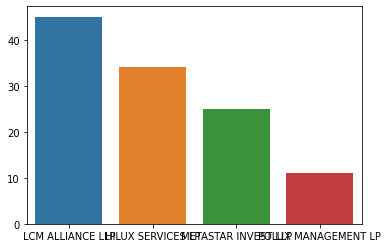

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(series_to_plot.index, series_to_plot.values)

Visualizations of the top 10 most frequent clients

In [48]:
top_10_payers = data.groupby(['payer_name_norm'])['amount_eur'].sum().reset_index().sort_values(by='amount_eur', ascending=False).head(10)
top_10_payers

,payer_name_norm,amount_eur
145,HILUX SERVICES LP,1200261307.24
34,BAKTELEKOM MMC,1099309976.55
201,LCM ALLIANCE LLP,649262052.94
223,METASTAR INVEST LLP,347064752.93
274,POLUX MANAGEMENT LP,250392638.92
111,FABERLEX LP,128637044.16
175,JETFIELD NETWORKS LIMITED,81405862.58
292,RIVERLANE LLP,56237109.00
319,SOVER DEVELOPMENT LLP,36825586.77
103,ELEKTROMASH MMC,34906787.20


<AxesSubplot:xlabel='payer_name_norm', ylabel='amount_eur'>

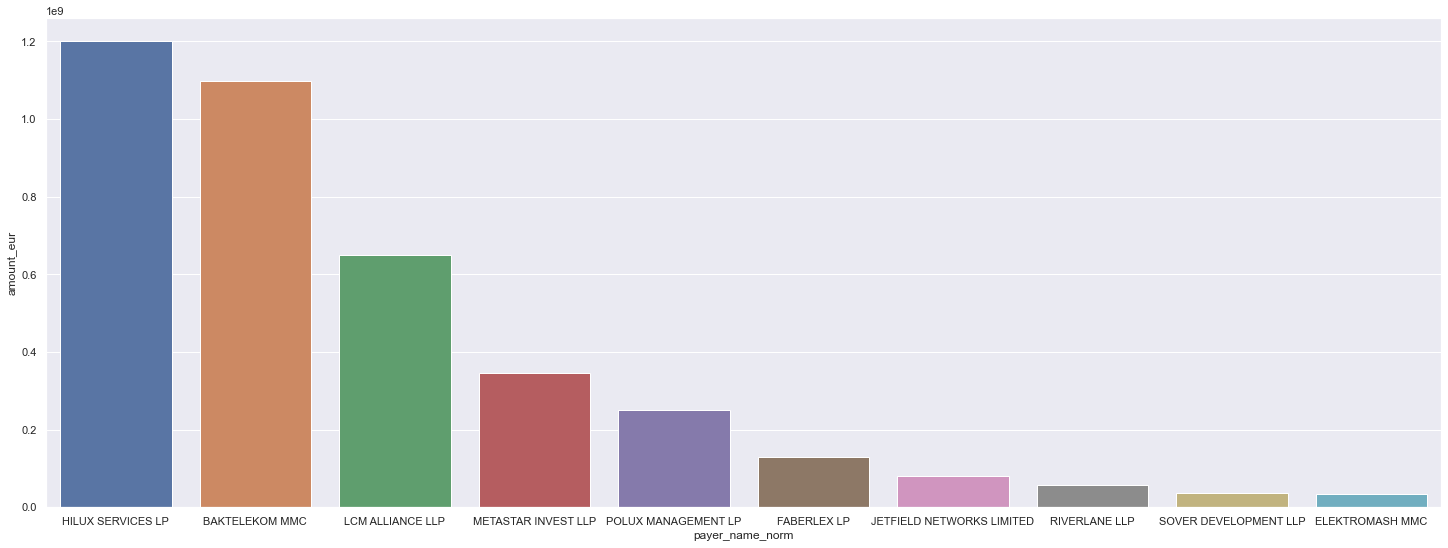

In [51]:
sns.set(rc={'figure.figsize': (25,9)})
sns.barplot(data=top_10_payers, x='payer_name_norm', y='amount_eur')

In [53]:
#Create individual dataframes for further investigation

df_hilux = data[data['payer_name_norm'] == 'HILUX SERVICES LP']
df_bakt = data[data['payer_name_norm'] == 'BAKTELEKOM MMC']
df_meta = data[data['payer_name_norm'] == 'METASTAR INVEST LLP']
df_lcm = data[data['payer_name_norm'] == 'LCM ALLIANCE LLP']
df_polux = data[data['payer_name_norm'] == 'POLUX MANAGEMENT LP']

Hilux Services LP

In [55]:

hilux_payer = data[data['payer_name_norm'] == 'HILUX SERVICES LP']
hilux_bene = data[data['beneficiary_name_norm'] == 'HILUX SERVICES LP']


In [56]:
hilux_payer.groupby('beneficiary_name_norm')['amount_usd'].sum().sort_values(ascending = False)

beneficiary_name_norm
FABERLEX LP                                   194450177
POLUX MANAGEMENT LP                           133145902
BONDWEST LLP                                  117404211
OVERMOND LLP                                  116204951
RICHFIELD TRADING L.P.                        113327390
                                                ...    
HOTELS+RESTAURANTS MANAGEMENT                       450
HIDRO KONTROL MAK.SAN.TIC.A.S.                      333
KONSTANZE MAYER                                     279
SECIL BAYRAG                                        252
ROBERT THOMAS Metall und Elektrowerke GmbH          227
Name: amount_usd, Length: 1115, dtype: int64

In [57]:
hilux_bene.groupby('payer_name_norm')['amount_usd'].sum().sort_values(ascending = False)

payer_name_norm
BAKTELEKOM MMC                        1240116453
FABERLEX LP                            169291420
POLUX MANAGEMENT LP                     35518576
ARASH MEDICAL PRODUCTION LTD            25528639
SECURO LTD.                             20559970
                                         ...    
RICHFIELD TRADING L.P.                      5000
ZER KELEPCE IMALAT VE TICARET               4432
PLASSON LTD.                                3333
ALGAN METAL SANAYI VE TICARET A.S.           607
JX NIPPON OIL AND ENERGY (RUS) LLC             1
Name: amount_usd, Length: 61, dtype: int64

In [58]:
hilux_payer[hilux_payer['beneficiary_name_norm'] == 'FABERLEX LP']

,payer_name,payer_jurisdiction,payer_account,source_file,amount_orig,id,beneficiary_type,beneficiary_core,amount_orig_currency,beneficiary_name,...,beneficiary_account,purpose,date,amount_usd,amount_eur,payer_type,payer_name_norm,payer_bank_country,transaction_direction,duplicated_transaction
10190,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,150.00,1346,Company,False,USD,FABERLEX LP,...,333516210006,1309105076690207 PAYMENT TO THE CONTRACT N 877...,2013-09-10,150,113.55,Company,HILUX SERVICES LP,EE,Outgoing Transaction,0
11240,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,18700.00,1507,Company,False,USD,FABERLEX LP,...,333516210006,1311075070141565 PAYMENT TO THE CONTRACT N 09 ...,2013-11-07,18700,13807.52,Company,HILUX SERVICES LP,EE,Outgoing Transaction,0
11791,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,104000.00,1637,Company,False,USD,FABERLEX LP,...,333516210006,1312035072903069 PAYMENT TO THE CONTRACT N 4 D...,2013-12-03,104000,76525.80,Company,HILUX SERVICES LP,EE,Outgoing Transaction,0
11930,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,230500.00,1688,Company,False,USD,FABERLEX LP,...,333516210006,1312095073872452 PAYMENT TO THE CONTRACT N 5 D...,2013-12-09,230500,169607.66,Company,HILUX SERVICES LP,EE,Outgoing Transaction,0
12035,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,700000.00,1752,Company,False,USD,FABERLEX LP,...,EE683300333516210006,1312165076179688 PAYMENT TO THE CONTRACT N 5 D...,2013-12-16,700000,515077.50,Company,HILUX SERVICES LP,EE,Outgoing Transaction,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16819,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,1956.00,1115,Company,False,GBP,FABERLEX LP,...,EE683300333516210006,1412175075348683 GROUP PAYMENT,2014-12-17,3078,2467.56,Company,HILUX SERVICES LP,EE,Outgoing Transaction,0
16846,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,16415.00,1054,Company,False,EUR,FABERLEX LP,...,EE683300333516210006,GROUP PAYMENT,2014-12-18,20475,16415.00,Company,HILUX SERVICES LP,EE,Outgoing Transaction,0
16863,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Allegato 4.xml,6242.00,4570,Company,False,EUR,FABERLEX LP,...,EE683300333516210006,GROUP PAYMENT,2014-12-19,7786,6242.00,Company,HILUX SERVICES LP,EE,Outgoing Transaction,0
16903,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,899700.00,4297,Company,False,USD,FABERLEX LP,...,EE683300333516210006,1412295076830414 GROUP PAYMENT,2014-12-29,899700,721317.38,Company,HILUX SERVICES LP,EE,Outgoing Transaction,0
